# Время ремонта телекоммуникаций

Verizon is the primary local telephone company (the legal term is Incumbent Local Exchange Carrier, ILEC) for a large area in the eastern United States. As such, it is responsible for providing repair service for the customers of other telephone companies (known as Competing Local Exchange Carriers, CLECs) in this region. Verizon is subject to fines if the repair times (the time it takes to fix a problem) for CLEC customers are substantially worse than those for Verizon’s own customers. This is determined using hypothesis tests, negotiated with the local Public Utilities Commission (PUC).

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd

In [2]:
# перестановочный критерий
from permute.core import two_sample

In [3]:
data = pd.read_csv('./verizon.txt', delimiter='\t')
print(data.size)
data.head()


3374


,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


boxplot

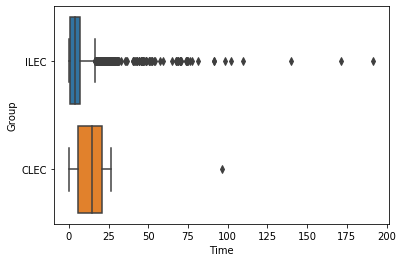

In [4]:
sns.boxplot(data=data,x='Time', y='Group')

In [5]:
x1 = data.loc[data['Group']=='ILEC']['Time'].values
x2 = data.loc[data['Group']=='CLEC']['Time'].values
x1.shape, x2.shape

((1664,), (23,))

Гистограмма

C:\Apps\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
C:\Apps\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


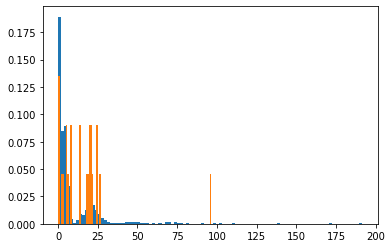

In [12]:
_= plt.hist(x1 , bins = 100 , normed=True , label='ILEC')
_= plt.hist(x2 , bins = 100 , normed=True , label='ILEC')

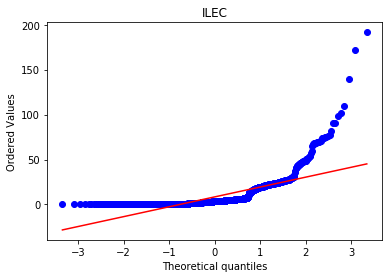

Text(0.5, 1.0, 'CLEC')

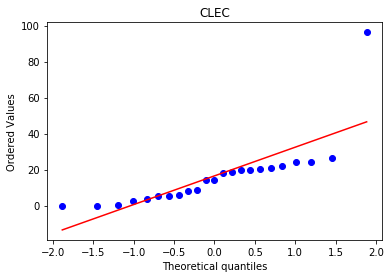

In [9]:
st.probplot(x1, plot=plt)
plt.title('ILEC')
plt.show()
st.probplot(x2, plot=plt)
plt.title('CLEC')


In [13]:
st.mannwhitneyu(x1,x2, alternative='two-sided')

MannwhitneyuResult(statistic=11452.0, pvalue=0.0009130276886676177)

Перестановочный критерий:

In [14]:
two_sample(x1,x2,  reps=1000, alternative='two-sided')

ValueError: high is out of bounds for int32

Критерий Смирнова:

In [15]:
st.ks_2samp(x1,x2)

Ks_2sampResult(statistic=0.45147888795986624, pvalue=9.726002165444392e-05)